# _Autogen Agents Demo for code execution_

<div class="alert alert-block alert-info">
 In this demo, we would like to show how can we use different type of agents to performs different tasks. In this example, we will ask our agents to jointly work to create a report.
</div>

### Let's dive in!

__First, let's declare all the necessary imports.__

In [35]:
import os, pprint, datetime
from dotenv import load_dotenv
from autogen import ConversableAgent, AssistantAgent
from autogen.coding import LocalCommandLineCodeExecutor
from IPython.display import Image

load_dotenv()

True

__Here, we are configuring our llm(Large language model) to be used by our agents__

In [36]:
GROQ_API_KEY = os.getenv("GROQ_API_KEY")

llm_config = {
    "config_list": [
        {
            "model": "llama3-70b-8192",
            "base_url": "https://api.groq.com/openai/v1",
            "api_key": GROQ_API_KEY,
            "api_type": "groq"
        }
    ],
}

__Defining our code executor__

In [37]:
executor = LocalCommandLineCodeExecutor(
    timeout=60,
    work_dir="result",
)

__Now let's create some agents who will act as a news anchor and also chat with each other__

In [38]:
code_executor_agent = ConversableAgent(
    name="code_executor_agent",
    llm_config=False,
    code_execution_config={"executor": executor},
    human_input_mode="ALWAYS",
    default_auto_reply=
    "Please continue. If everything is done, reply 'TERMINATE'.",
)

code_writer_agent = AssistantAgent(
    name="code_writer_agent",
    llm_config=llm_config,
    code_execution_config=False,
    human_input_mode="NEVER",
)

__Defining the task__

In [39]:
today = datetime.datetime.now().date()

message = f"Today is {today}. "\
"Create a bar-chart showing the popularity of programming languages in the last five years for PYTHON AND JAVASCRIPT. "\
"Make sure the code is in markdown code block and save the figure"\
" to a file report.png."""

__Now, let's start the chat to execute the code__

In [40]:
chat_result = code_executor_agent.initiate_chat(
    code_writer_agent,
    message=message,
)

code_executor_agent (to code_writer_agent):

Today is 2024-07-31. Create a bar-chart showing the popularity of programming languages in the last five years for PYTHON AND JAVASCRIPT. Make sure the code is in markdown code block and save the figure to a file report.png.

--------------------------------------------------------------------------------
code_writer_agent (to code_executor_agent):

To create a bar-chart showing the popularity of programming languages in the last five years for PYTHON and JAVASCRIPT, we need to collect data on their popularity trends. We can use the Google Trends API to fetch the data.

Here's the plan:

**Step 1: Collect data using Google Trends API**

First, let's install the necessary libraries:
```python
# filename: google_trends_api.py
import os
import pandas as pd
from pytrends.request import TrendReq

# Create a TrendReq object
trends = TrendReq(hl='en-US', tz=360)

# Fetch data for Python and JavaScript for the last 5 years
kw_list = ['Python', 'Java

Provide feedback to code_writer_agent. Press enter to skip and use auto-reply, or type 'exit' to end the conversation:  



>>>>>>>> NO HUMAN INPUT RECEIVED.

>>>>>>>> USING AUTO REPLY...

>>>>>>>> EXECUTING 2 CODE BLOCKS (inferred languages are [python, python])...
code_executor_agent (to code_writer_agent):

exitcode: 1 (execution failed)
Code output: Traceback (most recent call last):
  File "/Users/maslam033/Documents/learning/python/autogen/result/google_trends_api.py", line 4, in <module>
    from pytrends.request import TrendReq
ModuleNotFoundError: No module named 'pytrends'


--------------------------------------------------------------------------------
code_writer_agent (to code_executor_agent):

The error message indicates that the `pytrends` module is not installed. We need to install it before running the code.

Here's the updated code with the installation step:
```python
# filename: google_trends_api.py
import os
import pandas as pd
import pip

# Install the required libraries if not already installed
pip_packages = ['pytrends']
for package in pip_packages:
    if not os.popen(f'pip show {

Provide feedback to code_writer_agent. Press enter to skip and use auto-reply, or type 'exit' to end the conversation:  



>>>>>>>> NO HUMAN INPUT RECEIVED.

>>>>>>>> USING AUTO REPLY...

>>>>>>>> EXECUTING 2 CODE BLOCKS (inferred languages are [python, python])...
code_executor_agent (to code_writer_agent):

exitcode: 1 (execution failed)
Code output: WARNING: Package(s) not found: pytrends

[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: pip install --upgrade pip
Traceback (most recent call last):
  File "/Users/maslam033/Documents/learning/python/autogen/result/google_trends_api.py", line 22, in <module>
    data = trends.interest_over_time()
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/maslam033/Documents/learning/python/autogen/o_venv/lib/python3.12/site-packages/pytrends/request.py", line 232, in interest_over_time
    req_json = self._get_data(
               ^^^^^^^^^^^^^^^
  File "/Users/maslam033/Documents/learning/python/autogen/o_venv/lib/python3.12/site-packages/pytrends/request.py", line 159, in _get_data
    raise exceptions.TooManyRequestsError.fr

Provide feedback to code_writer_agent. Press enter to skip and use auto-reply, or type 'exit' to end the conversation:  



>>>>>>>> NO HUMAN INPUT RECEIVED.

>>>>>>>> USING AUTO REPLY...

>>>>>>>> EXECUTING 2 CODE BLOCKS (inferred languages are [python, python])...
code_executor_agent (to code_writer_agent):

exitcode: 0 (execution succeeded)
Code output: /Users/maslam033/Documents/learning/python/autogen/o_venv/lib/python3.12/site-packages/pytrends/request.py:260: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(False)
Rate limit exceeded. Retrying in 10 seconds...
Rate limit exceeded. Retrying in 10 seconds...


--------------------------------------------------------------------------------
code_writer_agent (to code_executor_agent):

It seems like the code executed successfully, but there are a few warnings and errors that need to be addressed.

The `FutureWarning` is a war

Provide feedback to code_writer_agent. Press enter to skip and use auto-reply, or type 'exit' to end the conversation:  exit


__Let's see the generated report__

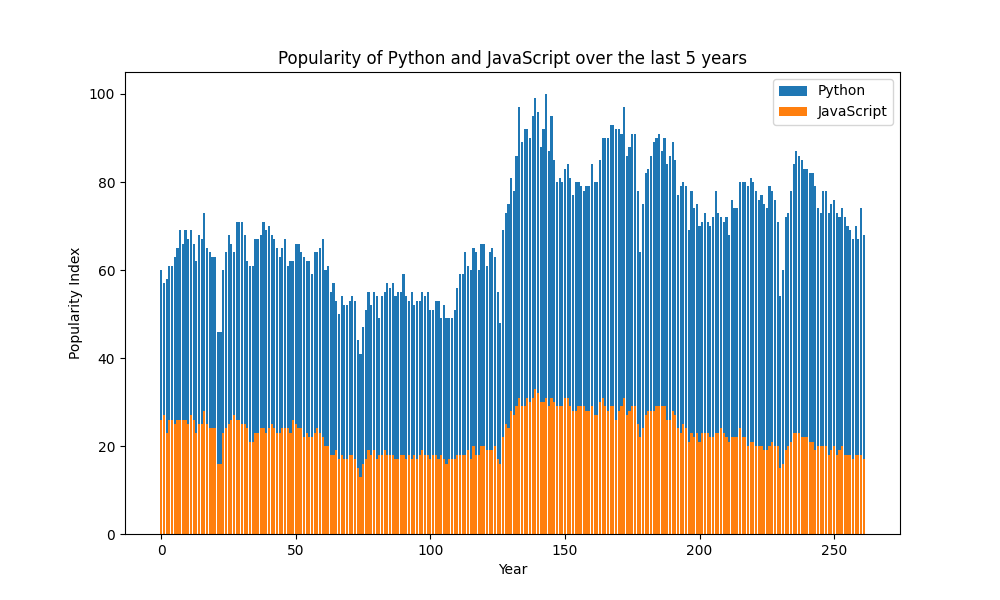

In [41]:
Image(os.path.join("result", "report.png"))